In [79]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [139]:
coin_bias = 0.7 # the probability of heads
n_trials = 100 # number of trials
## Set some threshold delta
n_experiments = 1000 # experiments to test the rule
count = 0
delta = 0.5
statistics = np.zeros(n_experiments)
thetas = np.zeros(n_experiments)
upper_bound = stats.binom.ppf(q = 0.5 + (1-delta)/2, n=n_trials, p=0.5)
lower_bound = stats.binom.ppf(q = 0.5 - (1-delta)/2, n=n_trials, p=0.5)
print(upper_bound, lower_bound)
prior = 1/2
for experiment in range(n_experiments):
    data = stats.bernoulli.rvs(coin_bias, size=n_trials)
    n_succeses = sum(data)
    # do a binomial test: This is our decision rule
    log_P_mu0 = 0
    log_P_mu1 = 0
    alpha = 2;
    beta = 1;
    for t in range(n_trials):
        marginal = alpha/(alpha + beta)
        log_P_mu0 += np.log(1/2)
        log_P_mu1 += np.log(marginal)* data[t] + np.log(1 - marginal)*(1 - data[t])
    P_mu0 = np.exp(log_P_mu0)
    P_mu1 = np.exp(log_P_mu1)
    posterior_mu0 = P_mu0 / (P_mu0 + P_mu1)
    #print(P_mu0, P_mu1, posterior_mu0)
    phi = stats.binom_test(x=n_succeses, n=n_trials, p=0.5)
    thetas[experiment] = n_succeses / n_trials
    statistics[experiment] = posterior_mu0
    if (posterior_mu0 <= delta):
        # Here we decide that coin_bias != 0.5, i.e. mu1 is true
        #assert(n_succeses > upper_bound or n_succeses < lower_bound)
        count+=1 
print(count / n_experiments)

53.0 47.0
0.993


In [114]:
# stats.binom_test(x=n_succeses, n=n_trials, p=0.5)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 999.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <BarContainer object of 10 artists>)

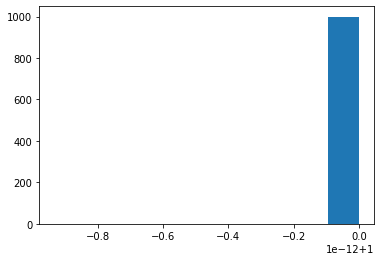

In [134]:
plt.hist(statistics)